## Machine Learning Project - Predict Fraud in Insurance Claim

### Data Science / Machine Learning Project Life Cycle

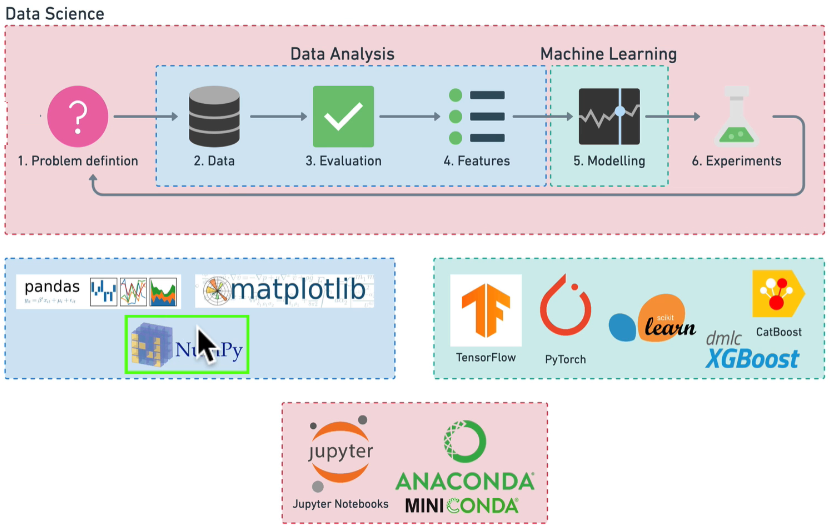

#### Problem Definition:
In this project we are going to build an end-to-end machine learning model to predict if an auto insurance claim is fraudulent or not. We are going to use a  dataset with 15420 records with 33 columns of various features of auto insurance claim and whether the claim was fraudulent or not. 

<a id="p"></a>
### Project Steps:

1. [Exploratory Data Analysis](#m1)
2. [Choose the right model for the given problem](#m2)
3. Train the model with data and make prediction
4. Evaluate the performance of the model
5. Tune to improve the performance of the model
6. Save and load the trained model

<a id="m1"></a>
### Module 1 - Exploratory Data Analysis / EDA
In this step we will perform the following tasks -
* [Import data from the source file into pandas dataframe](#m1_s1)
* [Analyze and modify the dataframe](#m1_s2)
* [Identify patterns and outlier in the data](#m1_s3)
* [Transform value of one or more columns (if necessary)](#m1_s4)
* [Handle missing value in the dataframe (if necessary)](#m1_s4)
* [Handle categorical features (if necessary)](#m1_s5)

# This code is work in progress, will be updated frequently

<a id="m1_s1"></a>
#### Import data from the source file into pandas dataframe

In [1]:
# import pandas library
import pandas as pd

In [2]:
# Import the data into dataframe
cl_v1 = pd.read_csv("data/fraud_oracle.csv")

<a id="m1_s2"></a>
#### Analyze and modify the dataframe
Here we will review the dataframe, see some sample records, check the data types of the columns, analyze the type of data in each columns and based on the analysis we will drop any column that we don't think will be useful for subsequent machine learning model.

In [4]:
# Check first few records of the dataframe
pd.options.display.max_columns = None
cl_v1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
# Check the datatypes of each column
cl_v1.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [6]:
# Check the size of the dataframe
print("Number of records in the dataframe: ", cl_v1.shape[0])
print("Number of columns in the dataframe: ", cl_v1.shape[1])

Number of records in the dataframe:  15420
Number of columns in the dataframe:  33


#### Drop Columns:
Based on the above review, we are going to drop the following columns -
- There are 2 sets of 3 features indicating when the accident happened and when the claim was made, we are going to keep the set indicating when the claim was made and drop the other set of features. 
- We also see that the PolicyType column is derived from VehicleCategory and BasePolicy columns, so we will drop the PolicyType column.
- We will drop the AgeOfPolicyHolder column because it has the Age range, whereas we have the actual age in the Age column.
- PolicyNumber, RepNumber, AgentType, NumberOfSuppliments, AddressChange_Claim, Year - Because they are not going to be useful for our machine learning model.

In [32]:
pd.options.display.max_columns = None
cl_v2 = cl_v1.drop(columns=['Month','WeekOfMonth', 'DayOfWeek', 'PolicyType', 'PolicyNumber', 'RepNumber', 'AgeOfPolicyHolder', 
                            'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim','Year'])
cl_v2.head()

,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,NumberOfCars,BasePolicy
0,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport,more than 69000,0,300,1,more than 30,more than 30,none,3 years,No,No,3 to 4,Liability
1,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport,more than 69000,0,400,4,more than 30,more than 30,none,6 years,Yes,No,1 vehicle,Collision
2,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport,more than 69000,0,400,3,more than 30,more than 30,1,7 years,No,No,1 vehicle,Collision
3,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sport,20000 to 29000,0,400,2,more than 30,more than 30,1,more than 7,Yes,No,1 vehicle,Liability
4,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport,more than 69000,0,400,1,more than 30,more than 30,none,5 years,No,No,1 vehicle,Collision


[Go to the top of the module](#m1)
<a id="m1_s3"></a>
#### Identify patterns and outlier in the data
In this step we will inspect any numeric features which are continuous in nature, such as age to see how the data in those columns are distributed and whether any of those features have outliers.

In [10]:
# Let's see the statistical info of the 5 columns through pandas describe function
cl_v2[['Age','Deductible']].describe()

,Age,Deductible
count,15420.000000,15420.000000
mean,39.855707,407.704280
std,13.492377,43.950998
min,0.000000,300.000000
25%,31.000000,400.000000
50%,38.000000,400.000000
75%,48.000000,400.000000
max,80.000000,700.000000


In [11]:
# Let's check the values of oldpeak column to make sure it's not categorical
cl_v2['Deductible'].value_counts()

Deductible
400    14838
700      311
500      263
300        8
Name: count, dtype: int64

##### Plot distribution of numeric variables
From the result of the describe function above we see Age is the only feature which is continuous and we get the statistical info such as mean, median, standard deviation, etc. However we would like to visualize the distribution of Age in plot.

In [12]:
# Import library
%matplotlib inline
import matplotlib.pyplot as plt

##### Histogram

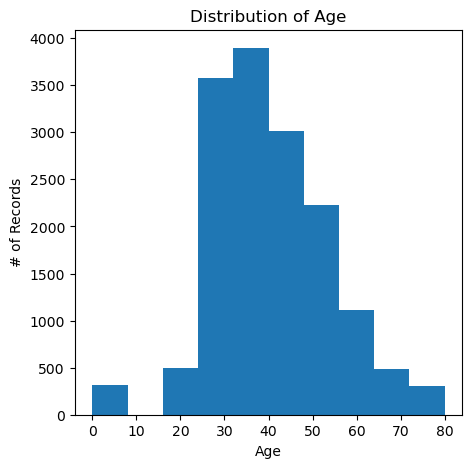

In [18]:
# Create the layout
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(cl_v2['Age'])
ax.set(xlabel='Age', ylabel="# of Records", title="Distribution of Age");

By observing the histogram of Age feature we see that it follow close to normal distribution pattern and have few outliers. Such as some claim records having drivers age less than 10.

[Go to the top of the module](#m1)
<a id="m1_s4"></a>
#### Transform value of one or more columns
After inspecting the dataframe we see that the columns have right values and hence need no transformation, like splitting, merging, creating new column, etc. So we can move to the next section.
#### Handle missing value in the dataframe

In [33]:
cl_v2.isna().sum()

Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
PoliceReportFiled       0
WitnessPresent          0
NumberOfCars            0
BasePolicy              0
dtype: int64

We see that there is no null / missing value in the dataframe. However from the describe function on Age column as well as from the histogram we see that there are records with Age = 0. Let's find out those records and see what we can do with those.

In [34]:
# Check how many records there with driver age less than 10
cl_v2[cl_v2['Age'] < 10]['Age'].value_counts()

Age
0    320
Name: count, dtype: int64

In [35]:
cl_v2.loc[cl_v2['Age'] < 10, 'DrAge'] = cl_v2['Age'].median()
cl_v2.loc[cl_v2['Age'] >= 10, 'DrAge'] = cl_v2['Age']
cl_v2.head()

,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,NumberOfCars,BasePolicy,DrAge
0,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport,more than 69000,0,300,1,more than 30,more than 30,none,3 years,No,No,3 to 4,Liability,21.0
1,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport,more than 69000,0,400,4,more than 30,more than 30,none,6 years,Yes,No,1 vehicle,Collision,34.0
2,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport,more than 69000,0,400,3,more than 30,more than 30,1,7 years,No,No,1 vehicle,Collision,47.0
3,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sport,20000 to 29000,0,400,2,more than 30,more than 30,1,more than 7,Yes,No,1 vehicle,Liability,65.0
4,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport,more than 69000,0,400,1,more than 30,more than 30,none,5 years,No,No,1 vehicle,Collision,27.0


In [36]:
# Check the result of the operation
cl_v2[cl_v2['Age'] < 10][['Age','DrAge']].head()

,Age,DrAge
7,0,38.0
13,0,38.0
28,0,38.0
31,0,38.0
58,0,38.0


In [37]:
cl_v2.drop(columns=['Age'], inplace=True)
cl_v2['DrAge'] = cl_v2['DrAge'].astype(int)
cl_v2.dtypes

Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Fault                   object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
PoliceReportFiled       object
WitnessPresent          object
NumberOfCars            object
BasePolicy              object
DrAge                    int32
dtype: object

[Go to the top of the module](#m1)
<a id="m1_s5"></a>
#### Handle categorical columns / features
All of the columns in the dataframe except DrAge, including the ones which are of numeric data type have categorical values. Let's inspect the values in those columns.

In [38]:
# Get the distribution of categorical columns

for i in cl_v2.columns:
    print("Distribution of values in categorical column name: ", i)
    if i == 'DrAge':
        continue
    print(cl_v2[i].value_counts())
    print("")

Distribution of values in categorical column name:  Make
Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64

Distribution of values in categorical column name:  AccidentArea
AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64

Distribution of values in categorical column name:  DayOfWeekClaimed
DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

Distribution of values in categorical column name:  MonthClaimed
MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep

##### One-Hot Encoding

We are going to apply OneHot encoding to all these categorical variable except the target variable.

In [106]:
pd.options.display.max_columns=None
hd_v2 = pd.get_dummies(hd_v1, columns=cat_col_names, dtype='int')
hd_v2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


[Go to the project index](#p)

<a id="m2"></a>
### Module 2 - Choose the right model for the given problem

The objective of Machine Learning is to find the right model or algorithm to train the given dataset, so that the model can predict the accurate (or near accurate) outcome on unknown data. Sckikit-learn documentation provides an excellent map (below), which can also be found at https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. We will use this map to narrow down few models and then run experiments with each of those models on our dataset to see which model performs the best. 

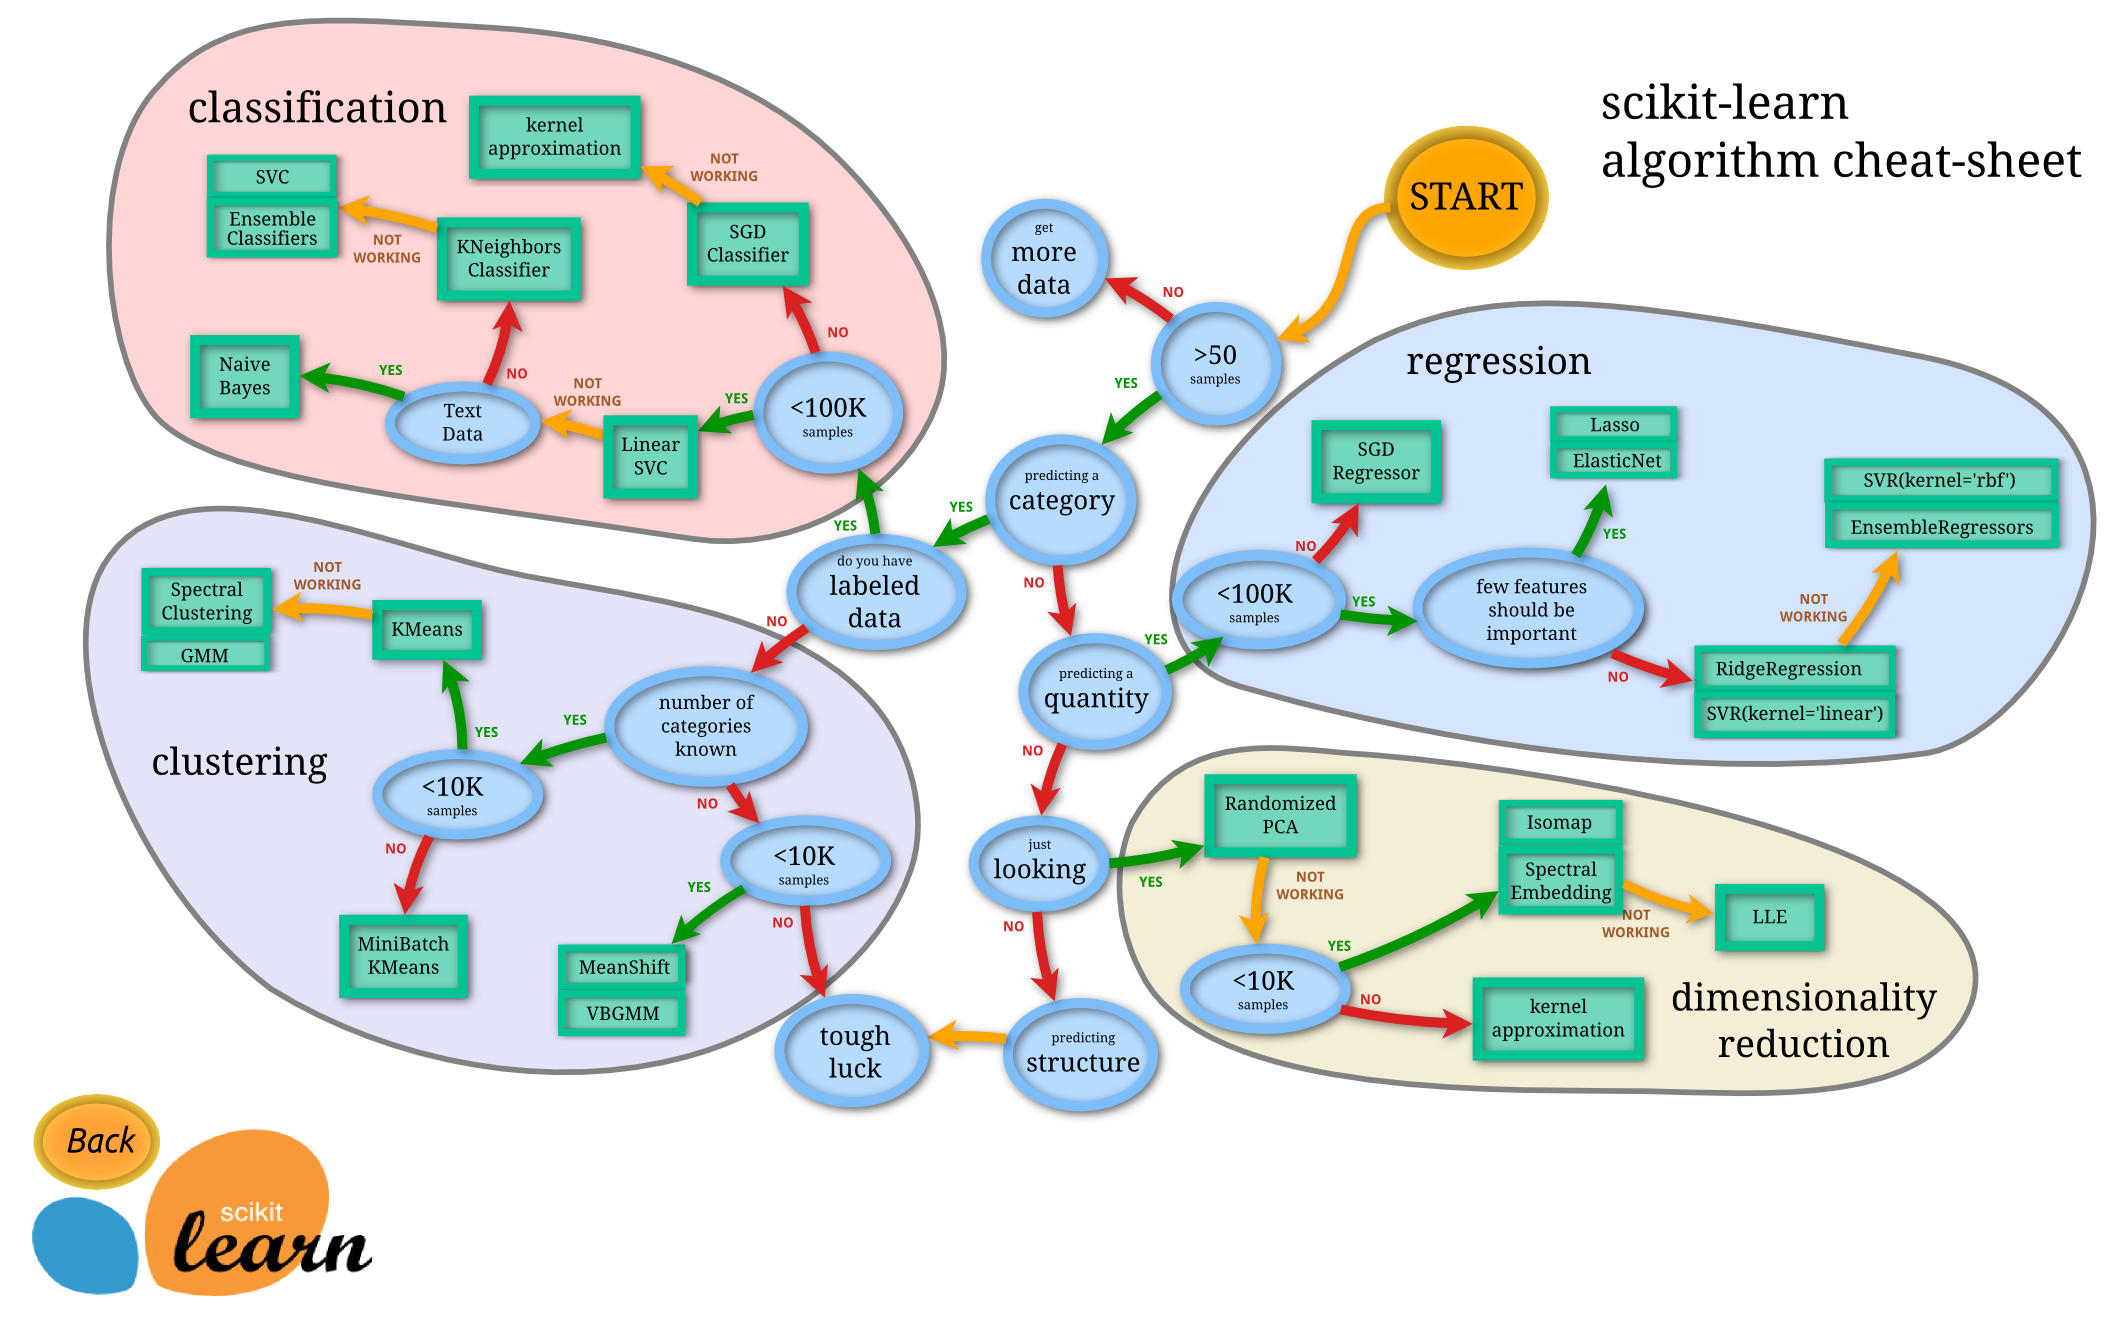

#### Navigate through the scikit-learn map to identify the right machine learning model

* Do we have more than 50 samples? **Yes**. ```cars_encoded.shape[0]``` = 4007
* What category of problem we are trying to solve? **Regression**, because we are trying to predict car price which is a continuous numerical variable.
* Do we have less than 100K samples? **Yes**.
* Are there few features which are important? **We are not sure**. We can find out which one or more independent features are important to predict the dependent feature, which is the car price by calculating the **correlation coefficient** between the independent and the dependent feature.

So, we would like to select multiple regression models such as **Lasso Regression**, **Ridge Regression**, and **Random Forest Regression** to experiment with our dataset. We will train all 3 models with our dataset and pick the one with performs the best. 